# CapeCod Apriori Sensitivity

In [1]:
import chainladder as cl

This example demonstrates the usage of the deterministic CapeCod method and
shows the sensitivity of the apriori expectation to various choices of ``trend``
and ``decay``.  Instead of using `GridSearch` we declare our own looping.

In [2]:
# Grab data
ppauto_loss = cl.load_sample('clrd').groupby('LOB').sum().loc['ppauto', 'CumPaidLoss']
ppauto_prem = cl.load_sample('clrd').groupby('LOB').sum() \
                .loc['ppauto']['EarnedPremDIR'].latest_diagonal

def get_apriori(decay, trend):
    """ Function to grab apriori array from cape cod method """
    cc = cl.CapeCod(decay=decay, trend=trend)
    cc.fit(ppauto_loss, sample_weight=ppauto_prem)
    return cc.detrended_apriori_.to_frame()

def get_plot_data(trend):
    """ Function to grab plot data """
    # Initial apriori DataFrame
    detrended_aprioris = get_apriori(0,trend)
    detrended_aprioris.columns=['decay: 0%']

    # Add columns to apriori DataFrame
    for item in [25, 50, 75, 100]:
        detrended_aprioris[f'decay: {item}%'] = get_apriori(item/100, trend)
    return detrended_aprioris

# Plot Data
plot1 = get_plot_data(-0.05)
plot2 = get_plot_data(-.025)
plot3 = get_plot_data(0)
plot4 = get_plot_data(0.025)

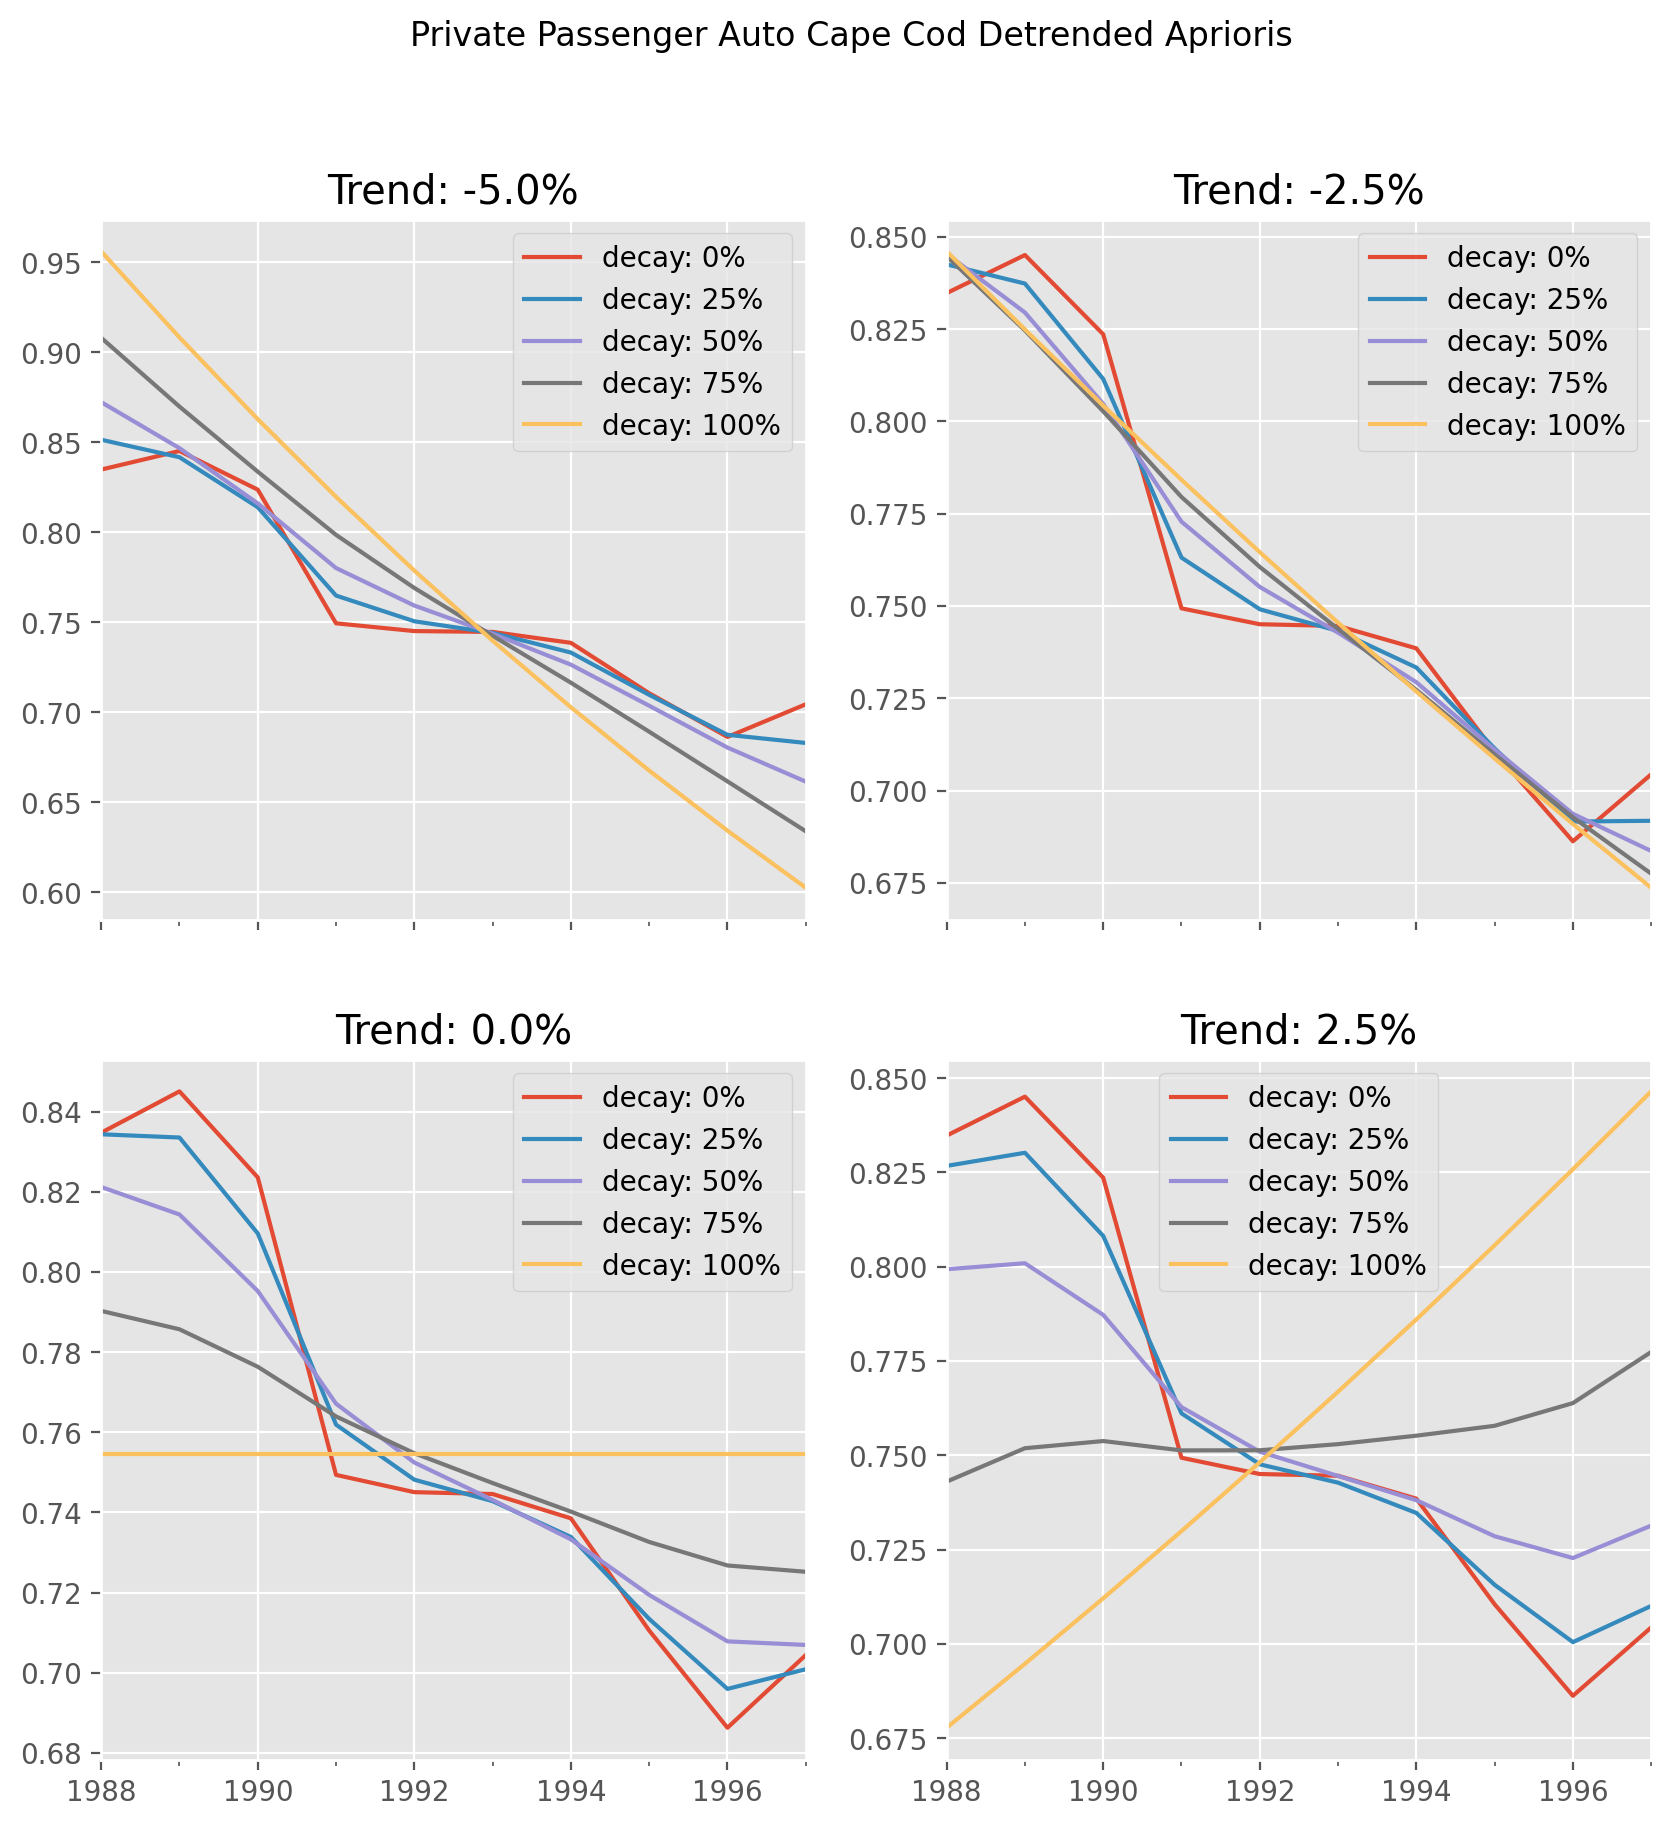

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(
    ncols=2, nrows=2, sharex=True, figsize=(10,10))
fig.suptitle("Private Passenger Auto Cape Cod Detrended Aprioris")
plot1.plot(ax=ax00, title='Trend: -5.0%')
plot2.plot(ax=ax01, title='Trend: -2.5%')
plot3.plot(ax=ax10, title='Trend: 0.0%')
plot4.plot(ax=ax11, title='Trend: 2.5%');